In [163]:
import sys
!{sys.executable} -m pip install scikit-surprise

In [164]:
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

In [165]:
mv_rating_data = pd.read_csv('Datasets/ratings_small 2.csv', delimiter = ',')
mv_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [166]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(mv_rating_data[['userId', 'movieId', 'timestamp']], reader)

In [167]:
mv_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [168]:
mv_rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [169]:
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

In [170]:
pmf = SVD(biased=True)
ubcf = KNNBasic(sim_options={'user_based': True})
ibcf = KNNBasic(sim_options={'user_based': False})

In [171]:
pmf_results = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
pmf_results_df = pd.DataFrame.from_dict(pmf_results)
ubcf_results = cross_validate(ubcf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ubcf_results_df = pd.DataFrame.from_dict(ubcf_results)
ibcf_results = cross_validate(ibcf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ibcf_results_df = pd.DataFrame.from_dict(ibcf_results)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1129561369.42281128066319.00791129523648.95541130955846.85921130088247.90811129639086.4307941123.4955
RMSE (testset)    1145746654.25881144199370.69351145717430.95811147057092.68071146211920.72841145786493.8639929594.1273
Fit time          0.35    0.34    0.34    0.33    0.34    0.34    0.00    
Test time         0.03    0.03    0.19    0.03    0.04    0.06    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5 

In [175]:
pmf_results_df

,test_mae,test_rmse,fit_time,test_time
0,1.129561e+09,1.145747e+09,0.345327,0.032601
1,1.128066e+09,1.144199e+09,0.336700,0.032228
2,1.129524e+09,1.145717e+09,0.339875,0.188835
3,1.130956e+09,1.147057e+09,0.332076,0.032850
4,1.130088e+09,1.146212e+09,0.342386,0.038089


In [176]:
pmf_mae = pmf_results_df['test_mae'].mean()
pmf_rmse = pmf_results_df['test_rmse'].mean()
ubcf_mae = ubcf_results_df['test_mae'].mean()
ubcf_rmse = ubcf_results_df['test_rmse'].mean()
ibcf_mae = ibcf_results_df['test_mae'].mean()
ibcf_rmse = ibcf_results_df['test_rmse'].mean()

In [177]:
print('PMF average MAE:', pmf_mae)
print('PMF average RMSE:', pmf_rmse)
print('UBCF average MAE:', ubcf_mae)
print('UBCF average RMSE:', ubcf_rmse)
print('IBCF average MAE:', ibcf_mae)
print('IBCF average RMSE:', ibcf_rmse)

PMF average MAE: 1129639086.4306777
PMF average RMSE: 1145786493.8638752
UBCF average MAE: 1129639084.265506
UBCF average RMSE: 1145785535.140873
IBCF average MAE: 1129639079.1656637
IBCF average RMSE: 1145786699.865583


In [148]:
# Question E

In [149]:
models = {'User-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': True}),
          'User-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': True}),
          'User-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': True}),
          'Item-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
          'Item-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': False}),
          'Item-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': False})}

In [150]:
results_rmse = {}
results_mae = {}
for model_name, model in models.items():
    sim_metric = model_name.split('(')[-1][:-1]
    print('Model:', model_name)
    model_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    results_rmse[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_rmse']) / 5
    results_mae[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_mae']) / 5

Model: User-based CF (cosine)
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1127908356.20181129611982.40031130808188.49801129306302.58091130560626.09021129639091.15421031788.9156
RMSE (testset)    1143988662.80411145805731.71811146962709.54931145556175.96711146618755.34671145786407.07711035543.8595
Fit time          0.04    0.05    0.04    0.04    0.04    0.04    0.00    
Test time         0.35    0.35    0.35    0.34    0.47    0.37    0.05    
Model: User-based CF (MSD)
Computing the msd similarity matrix..

In [118]:
results_mae

{('cosine', 'User-based CF '): 1129639078.1940455,
 ('MSD', 'User-based CF '): 1129639078.4793775,
 ('Pearson', 'User-based CF '): 1129639077.8055644,
 ('cosine', 'Item-based CF '): 1129639097.251147,
 ('MSD', 'Item-based CF '): 1129639085.3461044,
 ('Pearson', 'Item-based CF '): 1129639097.0453563}

In [151]:
results_rmse

{('cosine', 'User-based CF '): 1145786407.0770745,
 ('MSD', 'User-based CF '): 1145786534.4699292,
 ('Pearson', 'User-based CF '): 1145786230.9261124,
 ('cosine', 'Item-based CF '): 1145786406.4225917,
 ('MSD', 'Item-based CF '): 1145785308.880928,
 ('Pearson', 'Item-based CF '): 1145786523.8212001}

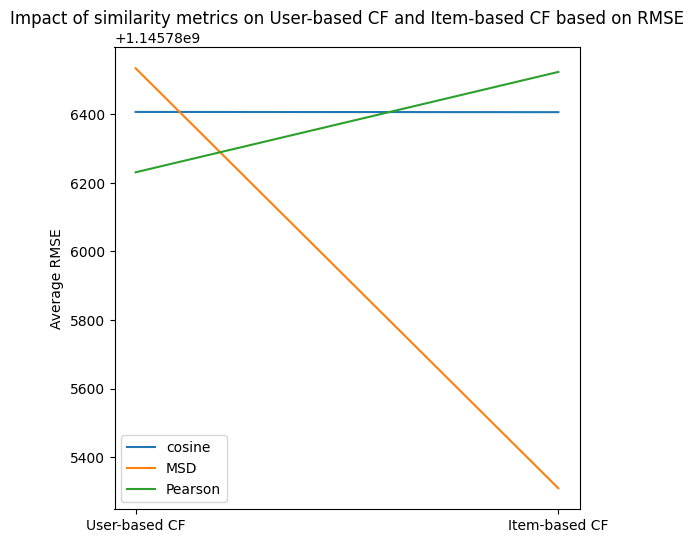

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
for sim_metric in ['cosine', 'MSD', 'Pearson']:
    #txt1 = '\'' + sim_metric + '\', \'User-based CF \''
    ax.plot([results_rmse[(sim_metric, 'User-based CF ')], results_rmse[(sim_metric, 'Item-based CF ')]],
            label=sim_metric)
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('Average RMSE')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on RMSE')
ax.legend()
plt.show()

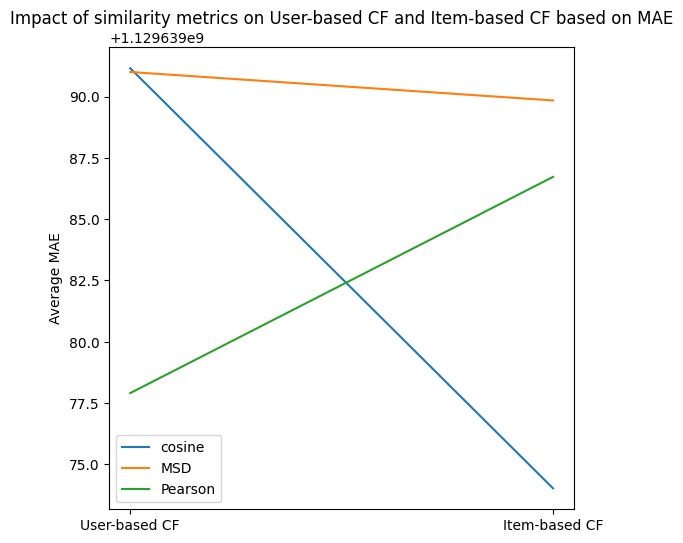

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))
for sim_metric in ['cosine', 'MSD', 'Pearson']:
    #txt1 = '\'' + sim_metric + '\', \'User-based CF \''
    ax.plot([results_mae[(sim_metric, 'User-based CF ')], results_mae[(sim_metric, 'Item-based CF ')]],
            label=sim_metric)
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('Average MAE')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on MAE')
ax.legend()
plt.show()

In [154]:
sim_options = {'user_based': True}
rmse_results_ub = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ub.append(cv_results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

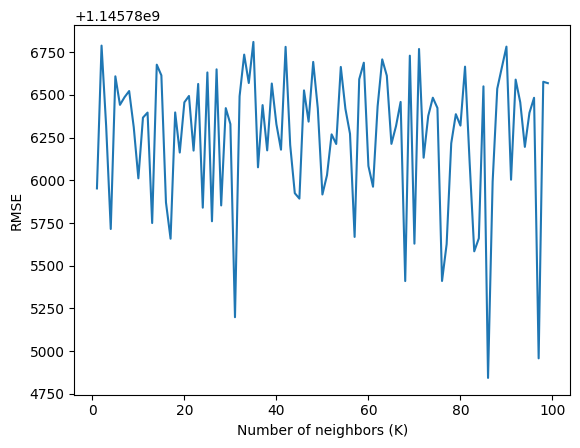

In [155]:
plt.plot(range(1, 100), rmse_results_ub)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

In [156]:
best_k = rmse_results_ub.index(min(rmse_results_ub)) + 1
print('Best K for User-based CF:', best_k)

Best K for User-based CF: 86


In [157]:
sim_options = {'user_based': False}
rmse_results_ib = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ib.append(cv_results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

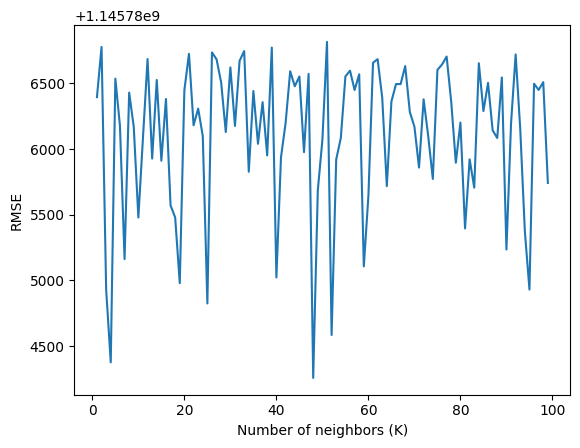

In [159]:
plt.plot(range(1, 100), rmse_results_ib)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

In [162]:
best_k = rmse_results_ib.index(min(rmse_results_ib)) + 1
print('Best K for item-based CF:', best_k)
print ('Best k for User-based CF:', rmse_results_ub.index(min(rmse_results_ub)) + 1 )

Best K for item-based CF: 48
Best k for User-based CF: 86
